In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
from immatch.utils.hpatches_helper import eval_summary
# # https://www.somersault1824.com/wp-content/uploads/2015/02/color-blindness-palette-e1423327633855.png

cbcolors={'cgreen':(26, 110, 53),
          'cgrass':(123, 252, 3),
          'cbrown':(161, 100, 56),
          'cyellow':(237, 187, 36),
          'cpurple':(177, 87, 250),
          'cpurblue' : (194, 207, 242),          
          'cgrey':(157, 163, 163),        
          'cblue':(66, 120, 245),
          'csky': (148, 250, 255),
          'corange':(245, 130, 69),
          'ccyan': (8, 189, 171),
          'crose' : (235, 101, 157),
          'cpink' : (255, 212, 212),
          'cred': (219, 15, 15),          
          'cdark': (0, 0, 0),
         }
cbcolors={k:(v[0]/255,v[1]/255,v[2]/255) for k,v in cbcolors.items()}

# Methods correspond to the saved cache files
methods = ['hesaff', 'hesaffnet', 'delf', 
           'D2Net', 'R2D2', 'aslfeat',
           'CAPS_SuperPoint_r4', 'CAPS_SIFT',  
           'SuperPoint_r4', 'SuperGlue_r4.m0.2', 'SuperGlue_r4.m0.9', 
           'SparseNCNet_N2000.im3200',
           'NCNet.im1024.m0.9',
           'Patch2Pix.im1024.m0.5',
           'Patch2Pix.im1024.m0.9',
          ]

# Legend names in the plot
names = ['HesAff+RootSIFT + NN', 'HAN+HN++ + NN', 'DELF + NN', 
         'D2-Net + NN', 'R2D2 + NN', 'ASLFeat + NN',
         'Superpoint+CAPS + NN', 'Sift+CAPS + NN',
         'SuperPoint + NN', 
         'Superpoint + SuperGlue', 'Superpoint+SuperGlue c0.9',     
         'Sparse-NCNet im3200 top2k', 
         'NCNet_adapted c0.9',
         'Patch2Pix c0.5',
         'Patch2Pix c0.9',
        ]

colors = [cbcolors['cdark'], cbcolors['cpurblue'], cbcolors['cgrey'],  
          cbcolors['cgrass'], cbcolors['ccyan'], cbcolors['cbrown'],  
          cbcolors['cyellow'], cbcolors['corange'],  
          cbcolors['cblue'],  cbcolors['cgreen'], cbcolors['csky'],  
          cbcolors['crose'],  
          cbcolors['cpink'],  
          cbcolors['cred'], cbcolors['cpurple']]

linestyles = ['-', '-', '--', 
              '-', '-', '-', 
              '-', '--', 
              '-', '-', '-', 
              '--', 
              '--',               
              '--', '--',
             ]

print(len(methods), len(linestyles), len(colors), len(names))



Can not import sparsencnet
15 15 15 15


## Load Precomputed Results

In [2]:
cache_dir = '../outputs/hpatches/cache'
errors = {}
for method in methods:
    output_file = os.path.join(cache_dir, method + '.npy')
    print('\n>>>{}'.format(method))
    if not os.path.exists(output_file):
        print(f'Error: can not load precomputed results!!')
        break
        
    print('Loading precomputed errors...')
    errors[method] = np.load(output_file, allow_pickle=True)
    print(eval_summary(errors[method]))



>>>hesaff
Loading precomputed errors...
# Features: mean=6710 min=296 max=26021
# Matches: a=2852, i=1586, v=4027
[ 1  3  5 10] px: a=[0.31 0.56 0.64 0.7 ]
i=[0.34 0.51 0.59 0.65]
v=[0.29 0.61 0.69 0.75]

>>>hesaffnet
Loading precomputed errors...
# Features: mean=3861 min=89 max=16326
# Matches: a=1960, i=1098, v=2760
[ 1  3  5 10] px: a=[0.33 0.62 0.7  0.76]
i=[0.37 0.61 0.7  0.75]
v=[0.29 0.62 0.71 0.76]

>>>delf
Loading precomputed errors...
# Features: mean=4608 min=1196 max=10939
# Matches: a=1912, i=1973, v=1856
[ 1  3  5 10] px: a=[0.44 0.49 0.57 0.74]
i=[0.89 0.9  0.9  0.92]
v=[0.01 0.11 0.27 0.57]

>>>D2Net
Loading precomputed errors...
# Features: mean=6142 min=1309 max=18974
# Matches: a=2496, i=2033, v=2926
[ 1  3  5 10] px: a=[0.11 0.43 0.67 0.84]
i=[0.17 0.53 0.77 0.93]
v=[0.06 0.34 0.57 0.76]

>>>R2D2
Loading precomputed errors...
# Features: mean=4962 min=3135 max=5000
# Matches: a=1635, i=1948, v=1346
[ 1  3  5 10] px: a=[0.33 0.76 0.84 0.87]
i=[0.38 0.81 0.9  0.93]


## Plot MMA Curves

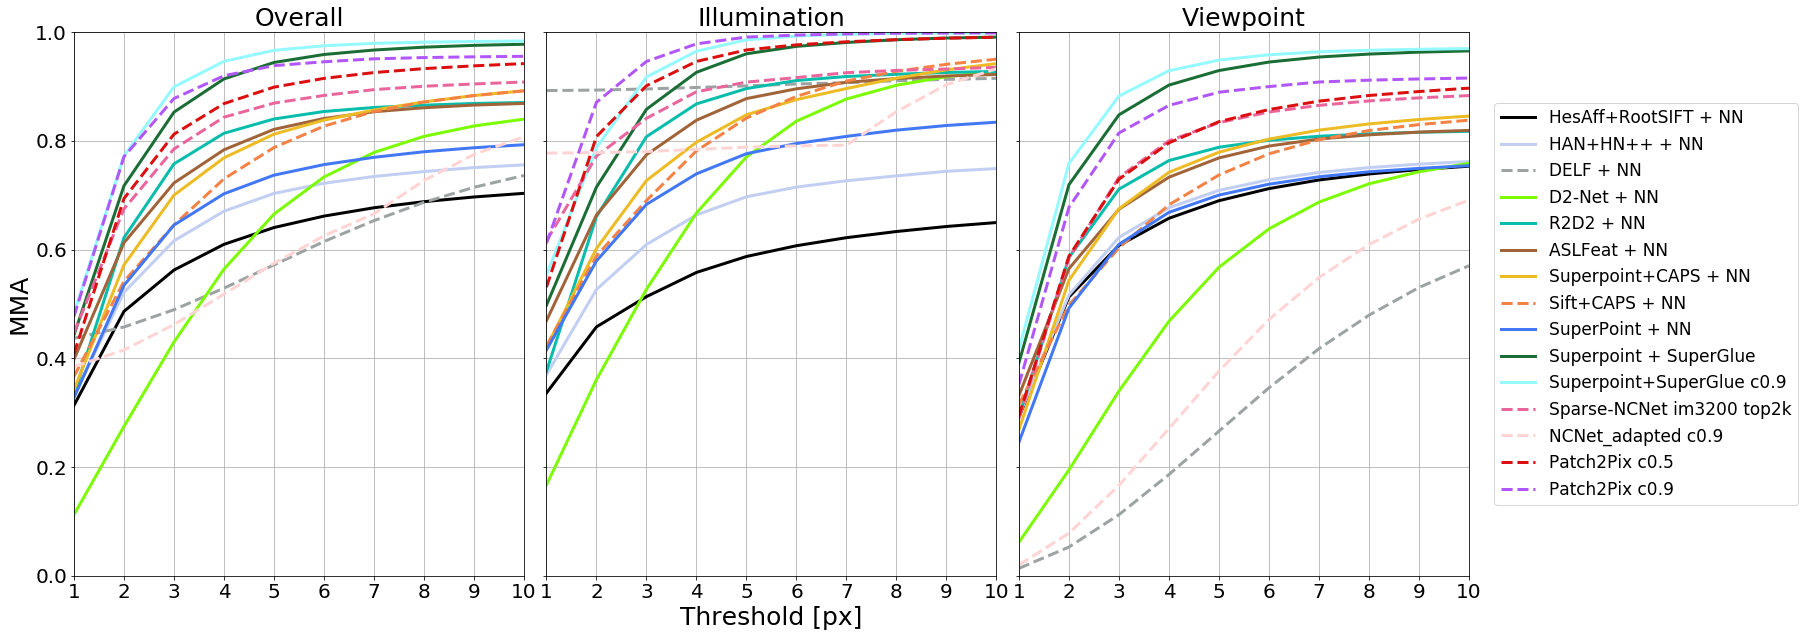

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

n_i = 52
n_v = 56
plt_lim = [1, 10]
plt_rng = np.arange(plt_lim[0], plt_lim[1] + 1)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

plt.figure(figsize=(25, 10))

plt.subplot(1, 3, 1)
ymin = 0.0
 
for method, name, color, ls in zip(methods, names, colors, linestyles):
    i_err, v_err, _ = errors[method]
    plt.plot(plt_rng, [(i_err[thr] + v_err[thr]) / ((n_i + n_v) * 5) for thr in plt_rng], color=color, ls=ls, linewidth=3, label=name)
plt.title('Overall')
plt.xlim(plt_lim)
plt.xticks(plt_rng)
plt.ylabel('MMA')
plt.ylim([ymin, 1])
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=20)

plt.subplot(1, 3, 2)
for method, name, color, ls in zip(methods, names, colors, linestyles):
    i_err, v_err, _ = errors[method]
    plt.plot(plt_rng, [i_err[thr] / (n_i * 5) for thr in plt_rng], color=color, ls=ls, linewidth=3, label=name)
plt.title('Illumination')
plt.xlabel('Threshold [px]')
plt.xlim(plt_lim)
plt.xticks(plt_rng)
plt.ylim([ymin, 1])
plt.gca().axes.set_yticklabels([])
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=20)

plt.subplot(1, 3, 3)
for method, name, color, ls in zip(methods, names, colors, linestyles):
    i_err, v_err, _ = errors[method]
    plt.plot(plt_rng, [v_err[thr] / (n_v * 5) for thr in plt_rng], color=color, ls=ls, linewidth=3, label=name)
plt.title('Viewpoint')
plt.xlim(plt_lim)
plt.xticks(plt_rng)
plt.ylim([ymin, 1])
plt.gca().axes.set_yticklabels([])
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=17, loc='center right', bbox_to_anchor=(0, 0, 1.75, 1))
plt.subplots_adjust(wspace=0.05)


plt.savefig('../outputs/hpatches/hseq.pdf', bbox_inches='tight', dpi=300)

